In [ ]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Sentiment labels are attached to movie reviews in the IMDB dataset.


## preprocessing of the dataset



The Preprocessing of the dataset involves turning every review into a series of word embeddings, where every word is represented by a fixed-size vector.

In [ ]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens and the embeddings' dimensions, in this case 64.
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

Custom-trained embedding layer with training sample size = 100


In [ ]:
# The number of words that should be considered as features
features = 10000
# Remove the text after this number of words(from the top max_features most common words)
length = 150

# Data loading to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)

x_train_data = x_train_data[:100]
y_train_data = y_train_data[:100]

# The integer lists are now transformed into a 2D integer tensor with the shape of {(samples, maxlen)}.
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)


# create a model
from keras.models import Sequential
from keras.layers import Flatten, Dense


model1 = Sequential()
# In order to finally flatten the embedded inputs, the maximum length of the input to the Embedding layer is provided.

model1.add(Embedding(10000, 8, input_length=length))
# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape
#`(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

# fit the model
history1 = model1.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 3s 196ms/step - loss: 0.6939 - acc: 0.5125 - val_loss: 0.6871 - val_acc: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 120ms/step - loss: 0.6706 - acc: 0

Plot the output

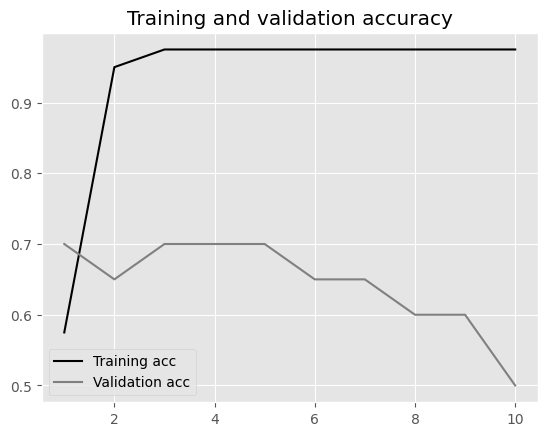

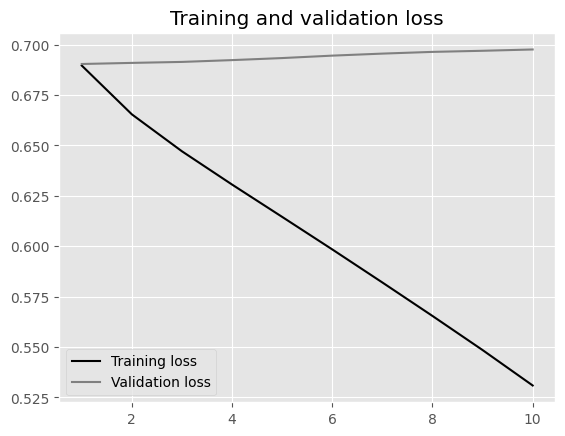

In [ ]:
import matplotlib.pyplot as plt

# Train accuracy
accuracy = history1.history["acc"]
# Validation accuracy
validation_accuracy = history1.history["val_acc"]
# Train loss
Train_loss = history1.history["loss"]
# Validation loss
validation_loss = history1.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss, "black", label = "Training loss")
plt.plot(epochs, validation_loss, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [ ]:
test_loss, test_acc = model1.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6955 - acc: 0.4984
Test loss: 0.6954883337020874
Test accuracy: 0.4984399974346161


## Custom-trained embedding layer with training sample size = 5000

In [ ]:
features=10000
length=150

# Data loading to integers
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)
x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)


texts = np.concatenate((x_train_data, x_test_data), axis=0)
labels = np.concatenate((x_train_data, x_test_data), axis=0)

x_train_data = x_train_data[:5000]
y_train_data = y_train_data[:5000]

Create a model


In [ ]:
model2 = Sequential()

model2.add(Embedding(10000, 8, input_length=length))

model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()
history2 = model2.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
125/125 [==============================] - 10s 80ms/step - loss: 0.6921 - acc: 0.5242 - val_loss: 0.6889 - val_acc: 0.5420
Epoch 2/10
125/125 [==============================] - 7s 55ms/step - loss: 0.6641 - acc: 0.7375 - val_loss: 0.6663 - val_acc: 0.6380
Epoch 3/10
12

Plot the output

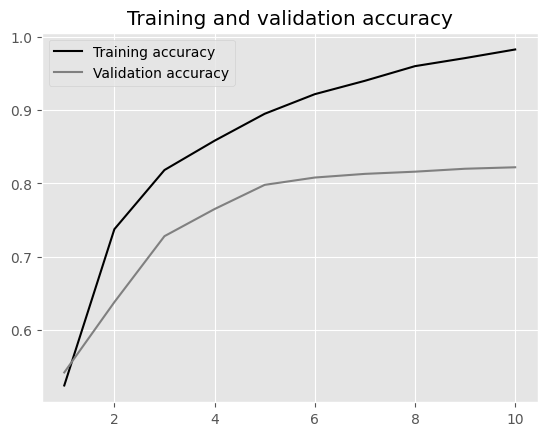

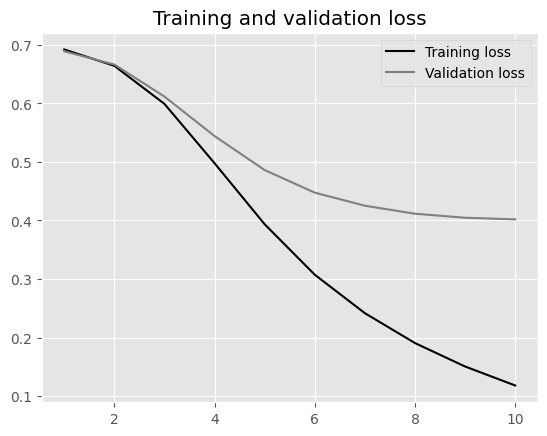

In [ ]:
accuracy2 = history2.history['acc']
validation_accuracy2 = history2.history['val_acc']
Train_loss2 = history2.history['loss']
validation_loss2 = history2.history['val_loss']

epochs = range(1, len(accuracy2) + 1)

plt.plot(epochs, accuracy2, 'black', label='Training accuracy')
plt.plot(epochs, validation_accuracy2, 'grey', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, Train_loss2, 'black', label='Training loss')
plt.plot(epochs, validation_loss2, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 2s 2ms/step - loss: 0.3741 - acc: 0.8319
Test loss: 0.3741080164909363
Test accuracy: 0.8319200277328491


 custom-trained embedding layer with training sample size = 2500

In [ ]:
features=10000
length=150
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)

x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

texts = np.concatenate((x_train_data, x_test_data), axis=0)
labels = np.concatenate((x_train_data, x_test_data), axis=0)

x_train = x_train_data[:2500]
y_train_data = y_train_data_data[:2500]

Create the model

In [ ]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 9s 117ms/step - loss: 0.6924 - acc: 0.5145 - val_loss: 0.6912 - val_acc: 0.5240
Epoch 2/10
63/63 [==============================] - 6s 100ms/step - loss: 0.6746 - acc: 0.6905 - val_loss: 0.6885 - val_acc: 0.5420
Epoch 3/10
63/63

Plot the output

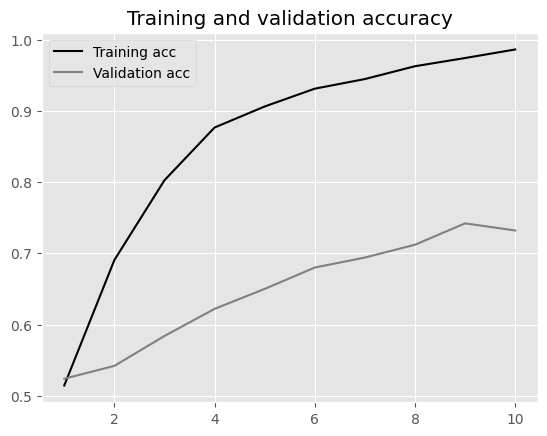

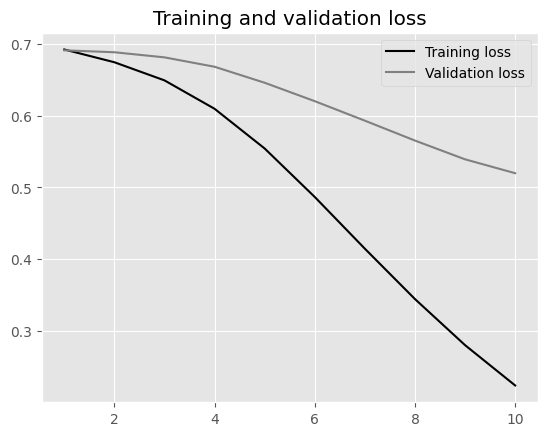

In [ ]:
accuracy3 = history3.history["acc"]
validation_accuracy3 = history3.history["val_acc"]
Train_loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

plt.plot(epochs, accuracy3, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy3, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss3, "black", label = "Training loss")
plt.plot(epochs, validation_loss3, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the model

In [ ]:
test_loss3, test_accuracy3 = model3.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 2s 2ms/step - loss: 0.5001 - acc: 0.7658
Test loss: 0.5001264810562134
Test accuracy: 0.7657999992370605


## custom-trained embedding layer with training sample size = 10000

Split the data

In [ ]:
features=10000
length=150
(x_train_data, y_train_data), (x_test_data, y_test_data) = imdb.load_data(num_words=features)

x_train_data = pad_sequences(x_train_data, maxlen=length)
x_test_data = pad_sequences(x_test_data, maxlen=length)

texts = np.concatenate((x_train_data, x_test_data), axis=0)
labels = np.concatenate((x_train_data, x_test_data), axis=0)

x_train_data = x_train_data[:10000]
y_train_data = y_train_data[:10000]

create the model

In [ ]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 5s 73ms/step - loss: 0.6925 - acc: 0.5130 - val_loss: 0.6929 - val_acc: 0.5220
Epoch 2/10
63/63 [==============================] - 4s 58ms/step - loss: 0.6742 - acc: 0.6895 - val_loss: 0.6897 - val_acc: 0.5660
Epoch 3/10
63/63 [

Plot the graoh

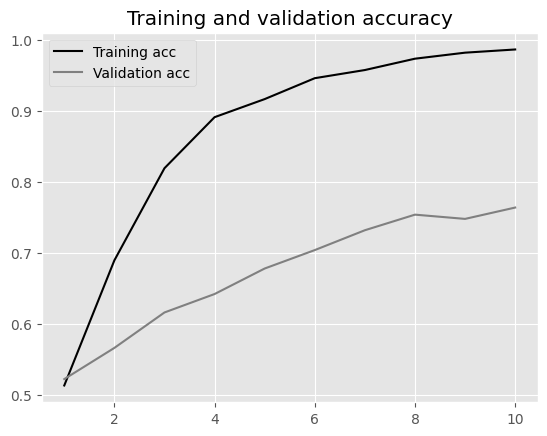

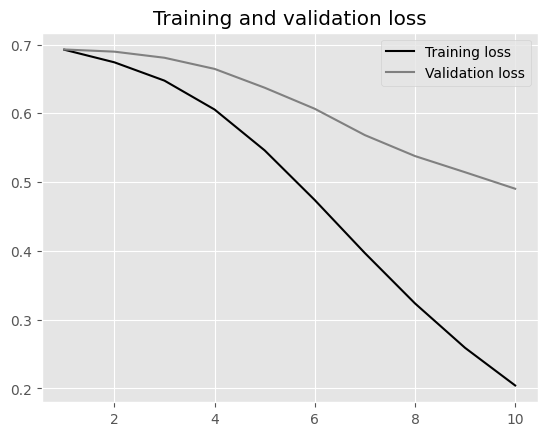

In [ ]:
accuracy4 = history4.history["acc"]
validation_accuracy4 = history4.history["val_acc"]
Train_loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

epochs = range(1, len(accuracy4) + 1)

plt.plot(epochs, accuracy4, "black", label = "Training acc")
plt.plot(epochs, validation_accuracy4, "grey", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, Train_loss4, "black", label = "Training loss")
plt.plot(epochs, validation_loss4, "grey", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

Test the output

In [ ]:
test_loss4, test_accuracy4 = model4.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 2s 2ms/step - loss: 0.4692 - acc: 0.7910
Test loss: 0.46916496753692627
Test accuracy: 0.7909600138664246


In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  10.0M      0  0:00:07  0:00:07 --:--:-- 12.3M


In [ ]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Using Trained Word Embeds. If there is insufficient training data to generate word embeddings for the problem you want to solve, you can use pre-trained word embeddings.

## Tokenizing the data

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considers only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train_data = data[:train_data] # (200, 100)
y_train_data = labels[:train_data] # shape (200,)
x_validation_data = data[train_data:train_data+valid_data] # shape (10000, 100)
y_validation_data = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


## Installing and setting up the GloVe word embedding

In [ ]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


Found 400000 word vectors.


We have trained 6B version of the GloVe model on a corpus of Wikipedia data and Gigaword 5; it has 6 billion tokens and 400,000 words.

## Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [ ]:
embedd_1 = 100

embedding_matrix = np.zeros((words, embedd_1))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

Create a model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, embedd_1, input_length=length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 15000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                480032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Pretrained word embeddings are loaded into the Embeddig layer. When using the Embedding layer, setting this to False assures that it is not trainable. If you set trainable to True, the optimization approach may change the word embedding values. It is recommended to avoid updating pretrained areas while pupils are still being trained to prevent them from forgetting what they already "know".

Fit the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_data, y_train_data,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation_data, y_validation_data))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 3s 524ms/step - loss: 2.9560 - acc: 0.5000 - val_loss: 1.7497 - val_acc: 0.5046
Epoch 2/10
4/4 [==============================] - 1s 451ms/step - loss: 0.7406 - acc: 0.6800 - val_loss: 1.3614 - val_acc: 0.5057
Epoch 3/10
4/4 [==============================] - 1s 447ms/step - loss: 0.4654 - acc: 0.8300 - val_loss: 2.0855 - val_acc: 0.5063
Epoch 4/10
4/4 [==============================] - 1s 370ms/step - loss: 0.3794 - acc: 0.8900 - val_loss: 1.5904 - val_acc: 0.5076
Epoch 5/10
4/4 [==============================] - 1s 445ms/step - loss: 0.9173 - acc: 0.6000 - val_loss: 1.2214 - val_acc: 0.4963
Epoch 6/10
4/4 [==============================] - 1s 440ms/step - loss: 0.1426 - acc: 0.9300 - val_loss: 0.8648 - val_acc: 0.5231
Epoch 7/10
4/4 [==============================] - 1s 361ms/step - loss: 0.0411 - acc: 1.0000 - val_loss: 0.8401 - val_acc: 0.5266
Epoch 8/10
4/4 [==============================] - 1s 285ms/step - loss: 0.0273 - acc: 1.00

Given the limited amount of training data, it is evident that the model overfits quickly. This same mechanism is responsible for the wide range of validation accuracy.

Plot the output

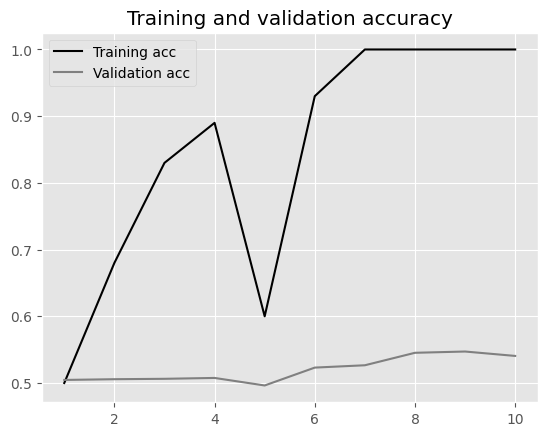

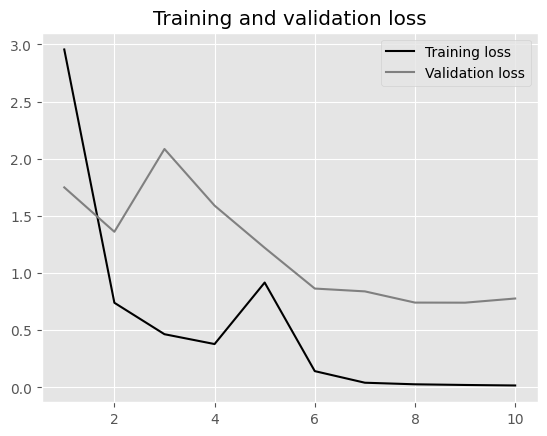

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'black', label='Training acc')
plt.plot(epochs, valid_accuracy, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'black', label='Training loss')
plt.plot(epochs, valid_loss, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test th model

In [ ]:
test_loss, test_accuracy= model.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.8170 - acc: 0.5056
Test loss: 0.8170028328895569
Test accuracy: 0.5055599808692932


## pretrained word embedding layer with training sample size = 5000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length2 = 150
train_data = 5000 # Training sample is 5000
valid_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_validation = data[train_data:train_data+valid_data]
y_validation = labels[train_data:train_data+valid_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_validation, y_validation))
model11.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 15000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                480032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 

Plot the output

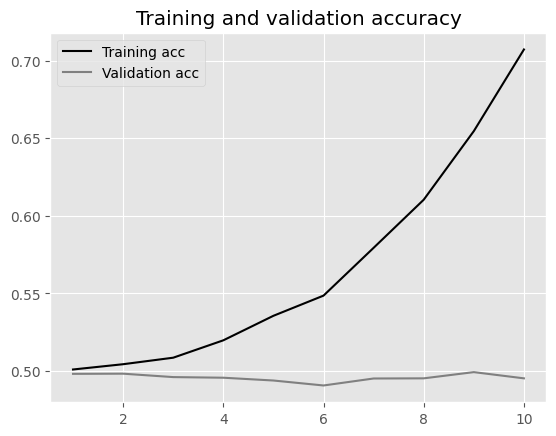

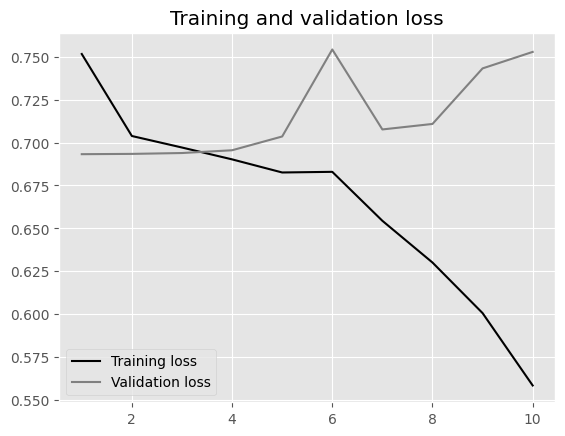

In [ ]:
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'black', label='Training acc')
plt.plot(epochs, valid_acc11, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'black', label='Training loss')
plt.plot(epochs, valid_loss11, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the model

In [ ]:
test_loss11, test_accuracy11 = model11.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 3s 4ms/step - loss: 0.7406 - acc: 0.4964
Test loss: 0.7405518889427185
Test accuracy: 0.49639999866485596


## pretrained word embedding layer with training sample size = 2500

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_data = 2500 #Trains on 2500 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data+valid_data]
y_val = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model12.save_weights('pre_trained_glove_model.h5')


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 15000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                480032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
79/79 [==============================] - 2s

Plot the output

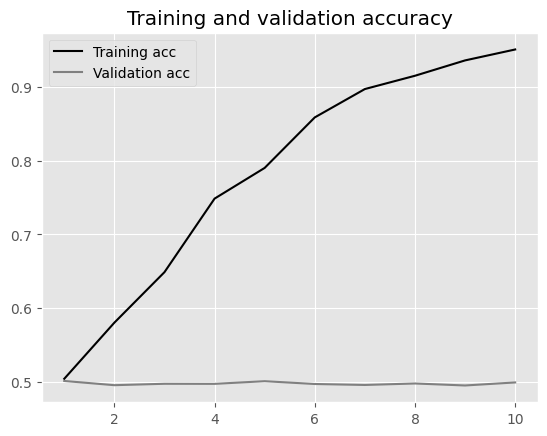

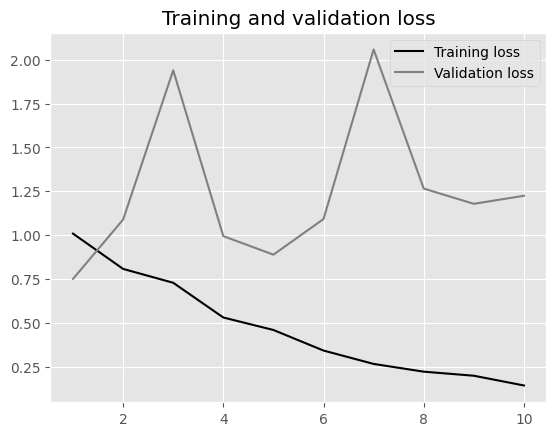

In [ ]:
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'black', label='Training acc')
plt.plot(epochs, val_acc12, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'black', label='Training loss')
plt.plot(epochs, val_loss12, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [ ]:
test_loss12, test_accuracy12 = model12.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

## pretrained word embedding layer with training sample size = 10000

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

length = 150
train_ds = 10000 # Trains on 10000 samples
valid_ds = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_ds]
y_train = labels[:train_ds]
x_val = data[train_ds:train_ds+valid_ds]
y_val = labels[train_ds:train_ds+valid_ds]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector



Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


create a model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model13.save_weights('pre_trained_glove_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_7 (Dense)             (None, 32)                480032    
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 4s 8ms/step - loss: 0.7089 - acc: 0.4953 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
313/3

Plot the output

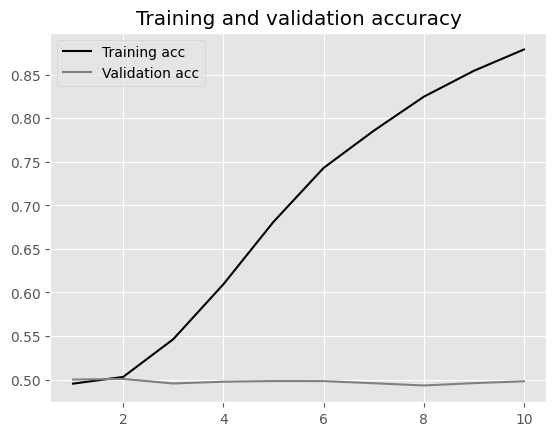

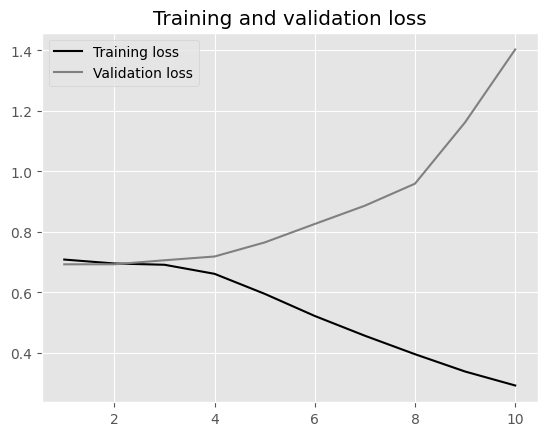

In [ ]:

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'black', label='Training acc')
plt.plot(epochs, valid_acc13, 'grey', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'black', label='Training loss')
plt.plot(epochs, valid_loss13, 'grey', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test the model

In [ ]:
test_loss13, test_accuracy13 = model13.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 3s 4ms/step - loss: 1.3591 - acc: 0.5002
Test loss: 1.3590989112854004
Test accuracy: 0.5002400279045105
